# PriceTrack: Unlocking Bike Market Insights

PriceTrack is a data science project designed to predict the valuation of used bike based on key input parameters.
Leveraging Multiple Linear regression model, it provides data-driven insights to help sellers make informed decisions.

## Exploratory Data Analysis (EDA)

This step helps us understand the data we are dealing with and it's various aspects.

We will be performing univariate and bivariate analysis along with plotting some graphs for better understanding.

In [873]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import seaborn as sns

In [874]:
df = pd.read_csv("Data.csv")
df

,model,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4,100,Hero
32644,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9,180,TVS
32645,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6,220,Bajaj
32646,Hero Super Splendor 125cc,15600,Jaipur,84186,First Owner,16,125,Hero


In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model       32648 non-null  object
 1   price       32648 non-null  int64 
 2   city        32648 non-null  object
 3   kms_driven  32648 non-null  int64 
 4   owner       32648 non-null  object
 5   age         32648 non-null  int64 
 6   power       32648 non-null  int64 
 7   brand       32648 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


In [876]:
df.describe()

,price,kms_driven,age,power
count,32648.00,32648.00,32648.00,32648.00
mean,68295.42,26344.63,8.05,213.51
std,90718.60,22208.53,4.03,134.43
min,4400.00,1.00,1.00,100.00
25%,25000.00,12000.00,5.00,150.00
50%,43000.00,20373.00,7.00,150.00
75%,80000.00,35000.00,10.00,220.00
max,1900000.00,750000.00,63.00,1800.00


### 📊 Data Types and Measurement Categories  

| Column Name   | Category   | Description |
|---------------|------------|-------------|
| `model`       | **Nominal**  | Specific bike model names, acting as unique identifiers without any order. |
| `price`       | **Ratio**    | Selling price of the bike; a continuous numeric variable with a meaningful zero. |
| `city`        | **Nominal**  | City of listing; categorical with no inherent ranking. |
| `kms_driven`  | **Ratio**    | Total kilometers the bike has been driven; continuous and has a true zero. |
| `owner`       | **Ordinal**  | Ownership status (e.g., First, Second); categorical with an implied order. |
| `age`         | **Ratio**    | Age of the bike in years; numeric with a true zero. |
| `power`       | **Ratio**    | Engine capacity in cc; continuous with a meaningful zero point. |
| `brand`       | **Nominal**  | Bike brand name; categorical without inherent order. |

### Useful reusable methods for plotting

In [877]:
def showDistribution(df, column, title=None):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, linewidth=0)

    mean_value = df[column].mean()
    median_value = df[column].median()
    std_value = df[column].std()
    percentile_1 = np.percentile(df[column], 1)
    percentile_99 = np.percentile(df[column], 99)
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)

    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Standard Deviation: {std_value}")
    print(f"1st Percentile: {percentile_1}")
    print(f"99th Percentile: {percentile_99}")
    print(f"25th Percentile (Q1): {q1}")
    print(f"75th Percentile (Q3): {q3}")
    print(f"IQR (Q3 - Q1): {q3 - q1}")

    plt.axvline(mean_value, color='black', linestyle='--', label="Mean")
    plt.axvline(median_value, color='red', linestyle='--', label="Median")
    # plt.axvline(mean_value + std_value, color='red', linestyle='--', label="Mean ± Std Dev")
    # plt.axvline(mean_value - std_value, color='red', linestyle='--')
    plt.axvline(percentile_1, color='blue', linestyle='-.', label='1st Percentile')
    plt.axvline(percentile_99, color='purple', linestyle='-.', label='99th Percentile')
    plt.axvline(q1, color='orange', linestyle='-', label='25th Percentile (Q1)')
    plt.axvline(q3, color='green', linestyle='-', label='75th Percentile (Q3)')

    plt.title(title if title else f'{column} Distribution')
    plt.xlabel(column.capitalize())
    plt.ylabel('No. of Vehicles')
    plt.legend()
    plt.show()

def showZScoreBoxPlot(df, column, title=None):
    if title is None:
        f'Boxplot of Z-Score of {column}'
    plt.figure(figsize=(10, 6))
    # Box plot of z-score of column
    z_score = (df[column] - df[column].mean()) / df[column].std()
    sns.boxplot(x=z_score)
    plt.title(title)
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')
    plt.show()

### Useful reusable methods for removing outliers

In [878]:
def remove_iqr_outliers(df, col_name, showRemovedRecords=False):
    iqr = df[col_name].quantile(0.75) - df[col_name].quantile(0.25)
    lower_bound = df[col_name].quantile(0.25) - (iqr * 1.5)
    upper_bound = df[col_name].quantile(0.75) + (iqr * 1.5)
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    iqr_outliers_mask = (df[col_name] < lower_bound) | (df[col_name] > upper_bound)
    print(f"{df[iqr_outliers_mask].shape[0]} records to will be removed")
    if showRemovedRecords:
        print("Records to be removed:")
        outlier_df = df[iqr_outliers_mask]
        print(outlier_df)
    df_without_outliers = df[~iqr_outliers_mask]
    print("New shape after removing IQR outliers: ", df_without_outliers.shape)
    return df_without_outliers

def remove_z_score_outliers(df, col_name, showRemovedRecords=False):
    z_score = (df[col_name] - df[col_name].mean()) / df[col_name].std()
    z_score_outliers_mask = (z_score < -3) | (z_score > 3)
    print(f"{df[z_score_outliers_mask].shape[0]} records to will be removed")
    if showRemovedRecords:
        print("Records to be removed:")
        outlier_df = df[z_score_outliers_mask]
        print(outlier_df)
    df_without_outliers = df[~z_score_outliers_mask]
    print("New shape after removing z-score outliers: ", df_without_outliers.shape)
    return df_without_outliers

## 1) Age Distribution

In [879]:
df["age"].describe()

count   32648.00
mean        8.05
std         4.03
min         1.00
25%         5.00
50%         7.00
75%        10.00
max        63.00
Name: age, dtype: float64

In [880]:
# showDistribution(df, "age", "Age Distribution Histogram")

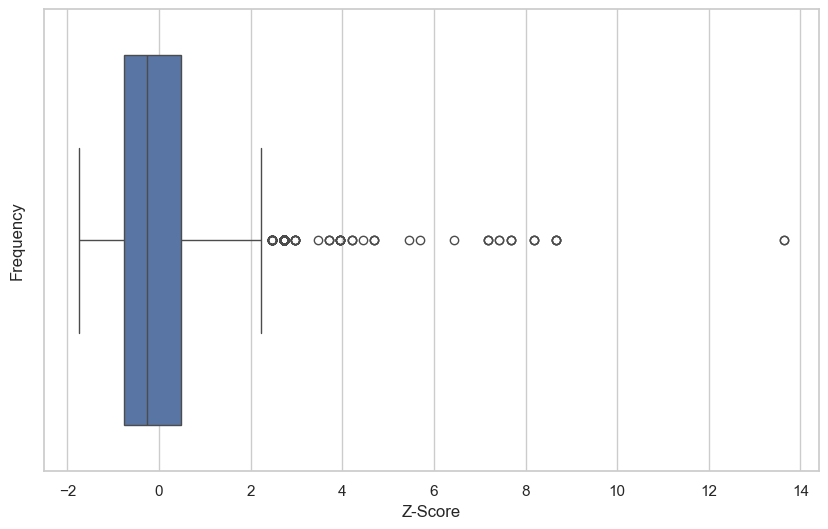

In [881]:
showZScoreBoxPlot(df, "age")

Removing the outliers whose z_score for `age` is beyond acceptance criteria i.e -3 to 3

In [882]:
# df_without_age_outliers = remove_z_score_outliers(df, "age")

Removing the outliers using IQR method:
- Upper Fence: Q3 + 1.5 * IQR
- Lower Fence: Q1 - 1.5 * IQR

In [883]:
df_without_age_outliers = remove_iqr_outliers(df, "age")

Lower Bound: -2.5
Upper Bound: 17.5
685 records to will be removed
New shape after removing IQR outliers:  (31963, 8)


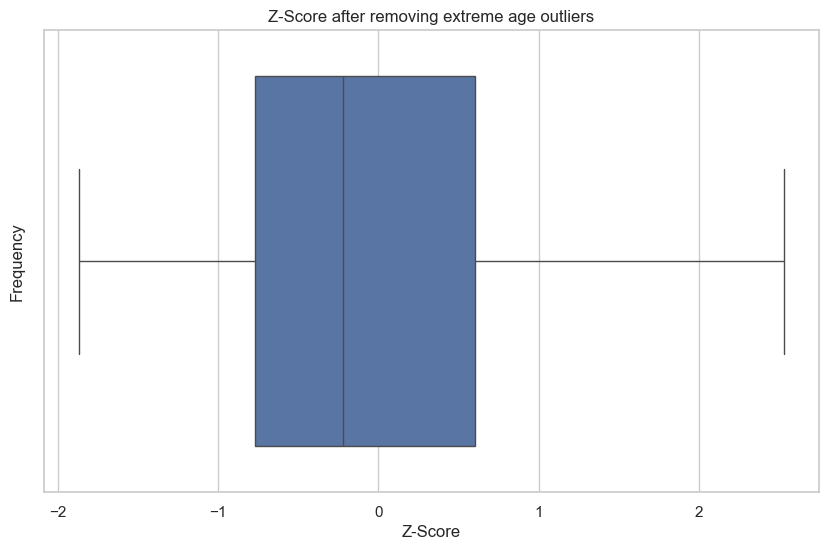

In [884]:
showZScoreBoxPlot(df_without_age_outliers, "age", title="Z-Score after removing extreme age outliers")

Mean: 7.797046585114038
Median: 7.0
Standard Deviation: 3.639281037871672
1st Percentile: 2.0
99th Percentile: 16.0
25th Percentile (Q1): 5.0
75th Percentile (Q3): 10.0
IQR (Q3 - Q1): 5.0


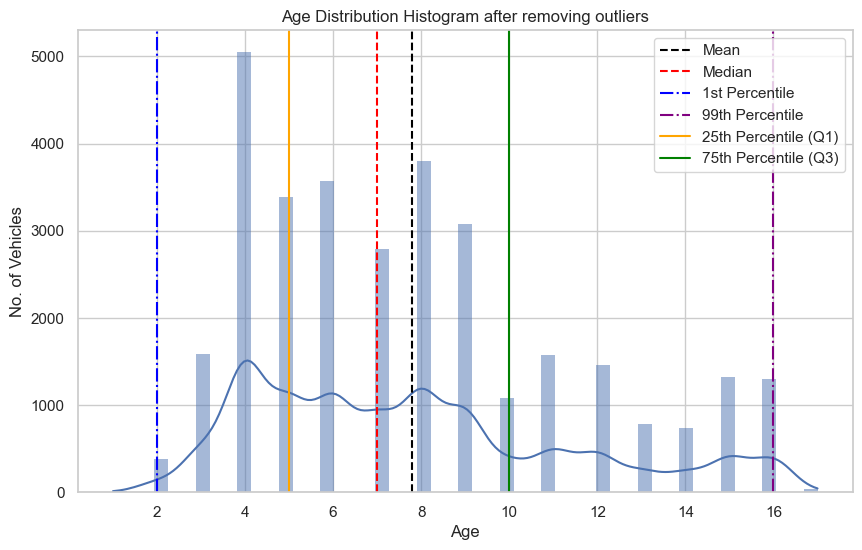

In [885]:
showDistribution(df_without_age_outliers, "age", title="Age Distribution Histogram after removing outliers")

## 2) Mileage Distribution

In [886]:
df_without_age_outliers["kms_driven"].describe()

count    31963.00
mean     26094.01
std      21758.06
min          1.00
25%      12000.00
50%      20245.00
75%      35000.00
max     750000.00
Name: kms_driven, dtype: float64

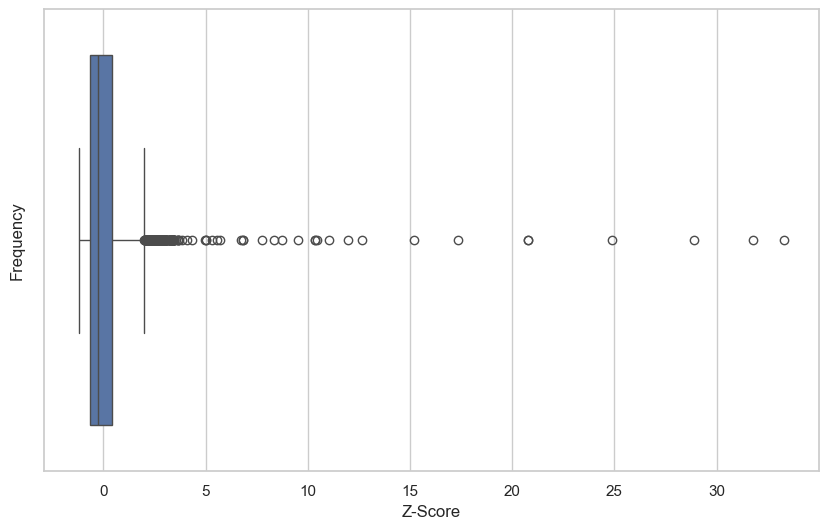

In [887]:
showZScoreBoxPlot(df_without_age_outliers, "kms_driven")

Removing the outliers whose z_score for `kms_driven` is beyond acceptance criteria i.e -3 to 3

In [888]:
# df_without_age_kms_outliers = remove_z_score_outliers(df_without_age_outliers, "kms_driven")

Removing the outliers that lie outside:
- Upper Fence: Q3 + 1.5 * IQR
- Lower Fence: Q1 - 1.5 * IQR

In [889]:
df_without_age_kms_outliers = remove_iqr_outliers(df_without_age_outliers, "kms_driven")

Lower Bound: -22500.0
Upper Bound: 69500.0
865 records to will be removed
New shape after removing IQR outliers:  (31098, 8)


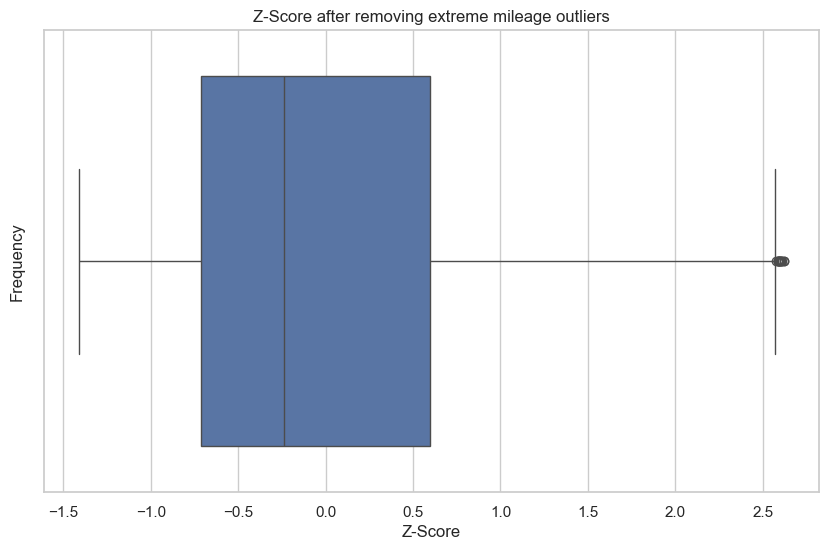

In [890]:
showZScoreBoxPlot(df_without_age_kms_outliers, "kms_driven", "Z-Score after removing extreme mileage outliers")

Mean: 24299.494115377194
Median: 20245.0
Standard Deviation: 17231.058423863004
1st Percentile: 140.0
99th Percentile: 65000.0
25th Percentile (Q1): 12000.0
75th Percentile (Q3): 34623.0
IQR (Q3 - Q1): 22623.0


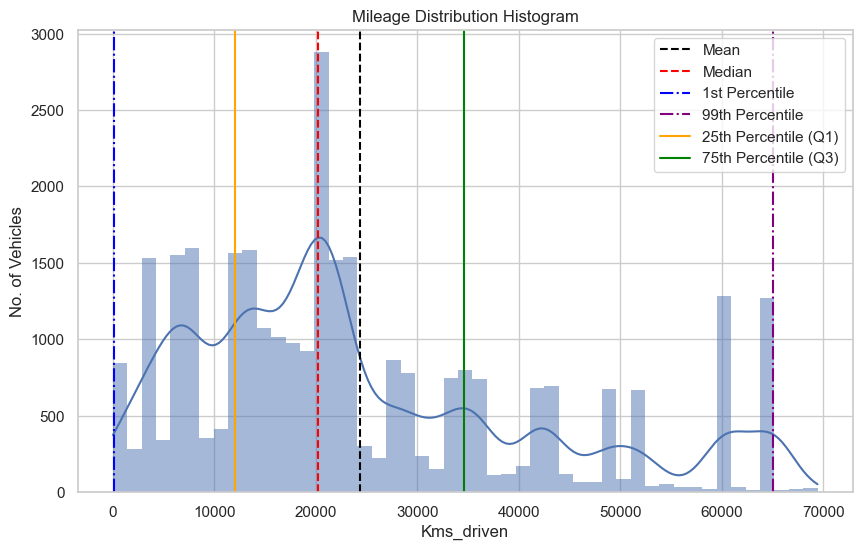

In [891]:
showDistribution(df_without_age_kms_outliers, "kms_driven", title="Mileage Distribution Histogram")

## 3) Price Distribution

In [892]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_without_age_kms_outliers["price"].describe()

count     31098.00
mean      70695.42
std       92208.13
min        4400.00
25%       25000.00
50%       45000.00
75%       85000.00
max     1900000.00
Name: price, dtype: float64

In [893]:
# showDistribution(df_without_age_kms_outliers, "price", title="Price Distribution Histogram")

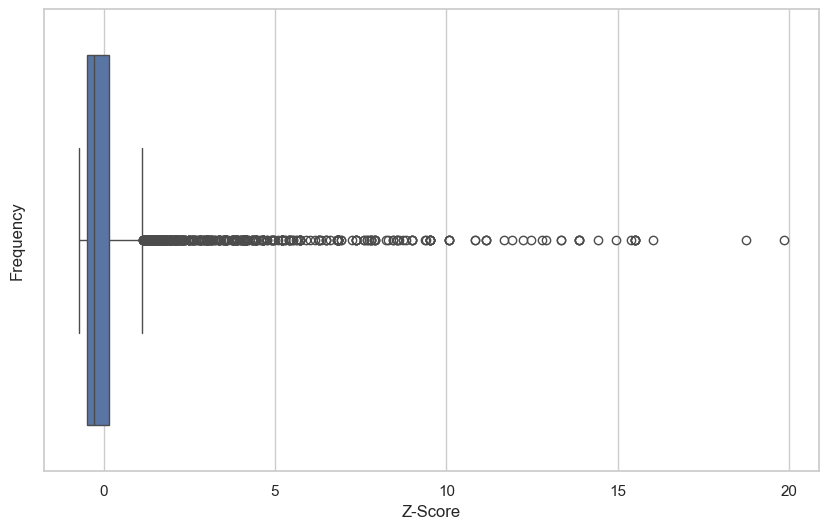

In [894]:
showZScoreBoxPlot(df_without_age_kms_outliers, "price")

We will not remove outliers because prices vary vastly based on company and power (cc)

Removing the outliers whose z_score for `kms_driven` is beyond acceptance criteria i.e -3 to 3

In [895]:
df_without_any_outliers = remove_z_score_outliers(df_without_age_kms_outliers, "price")

888 records to will be removed
New shape after removing z-score outliers:  (30210, 8)


Removing the outliers that lie outside:
- Upper Fence: Q3 + 1.5 * IQR
- Lower Fence: Q1 - 1.5 * IQR

In [896]:
# df_without_any_outliers = remove_iqr_outliers(df_without_age_kms_outliers, "price")

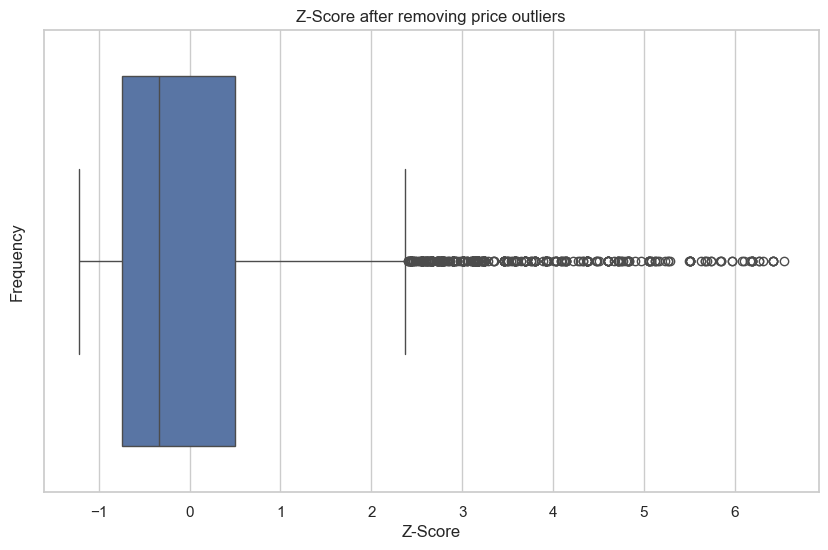

In [897]:
showZScoreBoxPlot(df_without_any_outliers, "price", "Z-Score after removing price outliers")

Mean: 57839.39884144323
Median: 43000.0
Standard Deviation: 43945.916026529885
1st Percentile: 10000.0
99th Percentile: 196700.0
25th Percentile (Q1): 25000.0
75th Percentile (Q3): 80000.0
IQR (Q3 - Q1): 55000.0


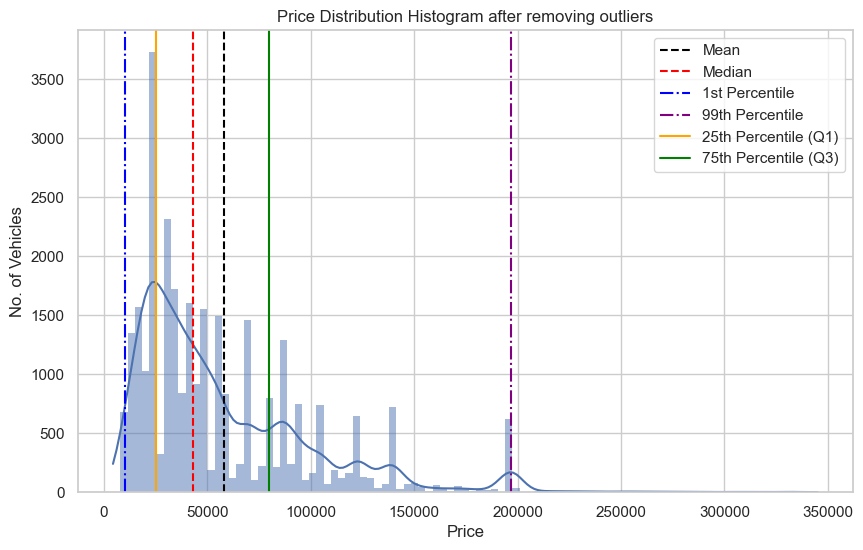

In [898]:
showDistribution(df_without_any_outliers, "price", title="Price Distribution Histogram after removing outliers")

## 4) Ownership Column

In [899]:
df_without_any_outliers["owner"].value_counts()

owner
First Owner             28237
Second Owner             1882
Third Owner                83
Fourth Owner Or More        8
Name: count, dtype: int64

We will convert `owner` into a numerical column using Ordinal Encoding 🔢

Since ownership count has a natural order, we can map it like this:

In [900]:
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth Owner Or More': 4
}
useful_df = df_without_any_outliers.copy()
useful_df['owner_encoded'] = useful_df['owner'].map(owner_mapping)
useful_df.head()

,model,price,city,kms_driven,owner,age,power,brand,owner_encoded
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,1
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,1
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,1
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,1
5,Yamaha FZs 150cc,53499,Delhi,25000,First Owner,6,150,Yamaha,1


## 5) Brand Distribution

In [901]:
brands = useful_df.groupby("brand").size().sort_values()
brands

brand
LML                    1
BMW                    8
Jawa                  10
Harley-Davidson       13
Kawasaki              36
Benelli               41
Hyosung               54
Mahindra              55
KTM                 1075
TVS                 1220
Suzuki              1448
Honda               2064
Yamaha              3881
Royal Enfield       4116
Hero                5078
Bajaj              11110
dtype: int64

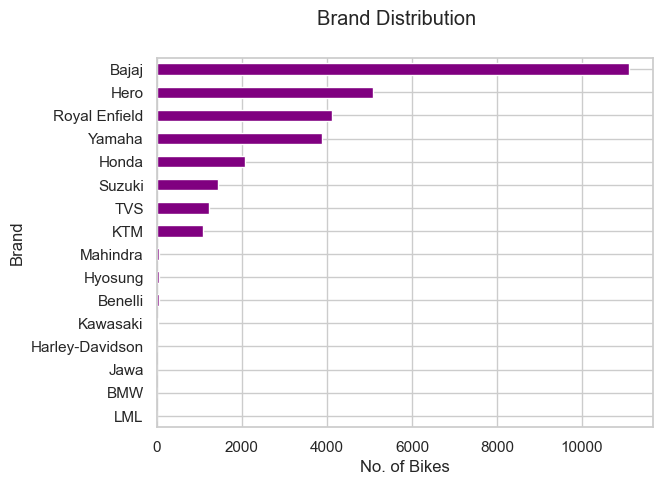

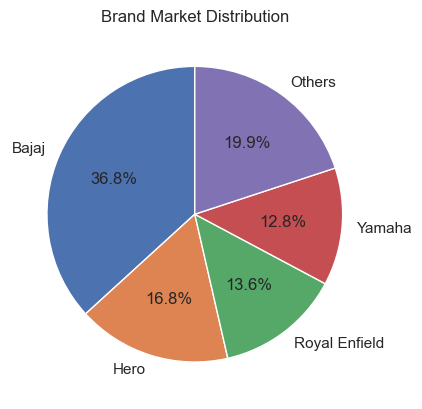

In [902]:
brands.plot(
    kind="barh",
    xlabel="No. of Bikes",
    ylabel="Brand",
    title="Brand Distribution",
    color="purple",
    subplots=True,
)
plt.show()

# Pie chart for company-wise sales
number_of_companies = 4
company_wise_sales_pie = useful_df.groupby("brand").size().sort_values(ascending=False).head(number_of_companies).copy()
company_wise_sales_pie.loc['Others'] = useful_df.groupby("brand").size().sort_values(ascending=False).tail(-number_of_companies).sum()
company_wise_sales_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Brand Market Distribution")
plt.show()


### 📊 Bike Brand Distribution in the Resale Market

##### **Bajaj, Hero, and Royal Enfield** together hold around **66%** of the used bike market

- **Bajaj (36.8%) ~ 11k and Hero (16.8%) ~ 6k** dominate the resale market, indicating high supply and affordability.  
- **Royal Enfield (13.6%) ~ 4k and Yamaha (12.8%) ~ 4k** show strong resale value and customer loyalty.  
- **Others (20%)** include brands like Honda, TVS, KTM, and Harley-Davidson with notable niche and premium offerings.

The data shows that **mass-market brands** lead the used bike space, while **premium and enthusiast brands** form a smaller but significant segment. 🏍️📈

## 6) Relation between Price and Mileage

In [903]:
def plot_scatter_chart(df, x_col, y_col, title=""):
    x = df[x_col]
    y = df[y_col]

    # Fit a line to the data
    coeffs = np.polyfit(x, y, deg=1) # Linear regression (degree 1)
    poly_eqn = np.poly1d(coeffs)
    y_fit = poly_eqn(x) # Predicted y values

    plt.figure(figsize=(11, 7))
    plt.scatter(x, y, s=6, marker=".", label="Data Points")
    plt.plot(x, y_fit, color='red', linewidth=2, label="Best Fit Line")  # Regression line
    plt.title(title)
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    plt.gca().ticklabel_format(axis='y', style='plain', useOffset=True, useLocale=True)
    plt.legend()
    plt.show()

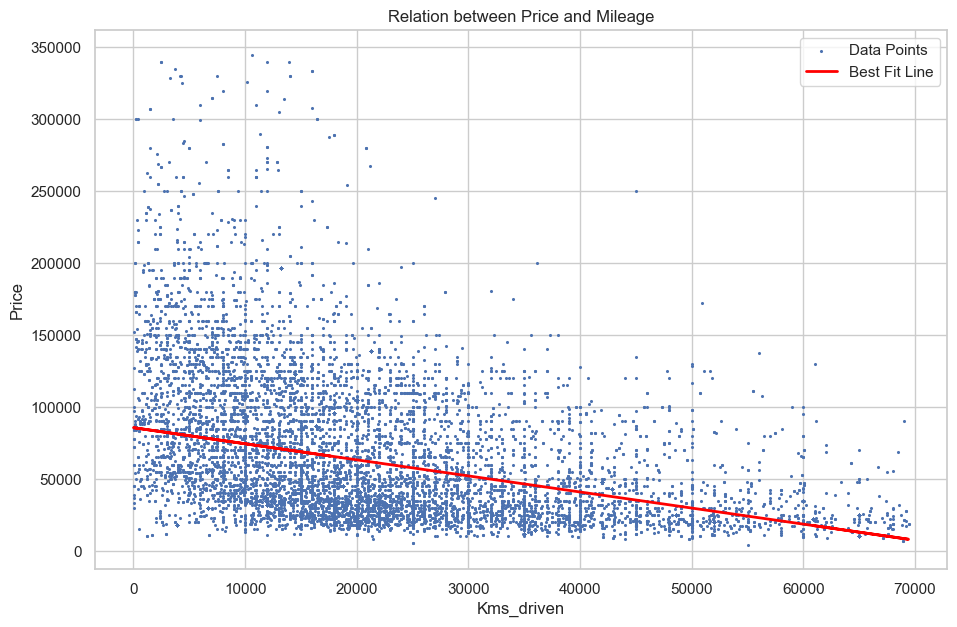

In [904]:
plot_scatter_chart(useful_df, "kms_driven", "price", "Relation between Price and Mileage")

### 📉 Relation between Price and Mileage

##### **Price drops as mileage increases**, indicating depreciation with usage

- Bikes with **lower mileage** generally have **higher resale value**.
- Outliers with **very high prices and low mileage** may indicate premium or luxury models.
- The overall trend suggests a **negative correlation** between price and mileage.

This shows that buyers tend to value **less-used bikes** more, and price drops significantly with increased usage. 🛣️💰

In [905]:

# # Load the data
# x_col="kms_driven"
# y_col="price"
# x = useful_df[x_col]
# y = useful_df[y_col]
# plt.figure(figsize=(11, 7))
# plt.scatter(x,y,s=6, marker=".", label="")
# plt.title("Relation between Price and Mileage using Scatter Plot")
# plt.gca().ticklabel_format(axis='y', style='plain', useOffset=True, useLocale=True)


# from matplotlib.patches import Rectangle

# # Create a rectangle at point (x, y) with specified width and height
# rect = Rectangle((0, 0), 40000, 200000, edgecolor='red', facecolor='none', lw=1)

# # Add the rectangle to the Axes
# ax = plt.gca()
# ax.add_patch(rect)


# plt.xlabel(x_col.capitalize())
# plt.ylabel(y_col.capitalize())
# plt.show()


## 7) Relation between Price and Age

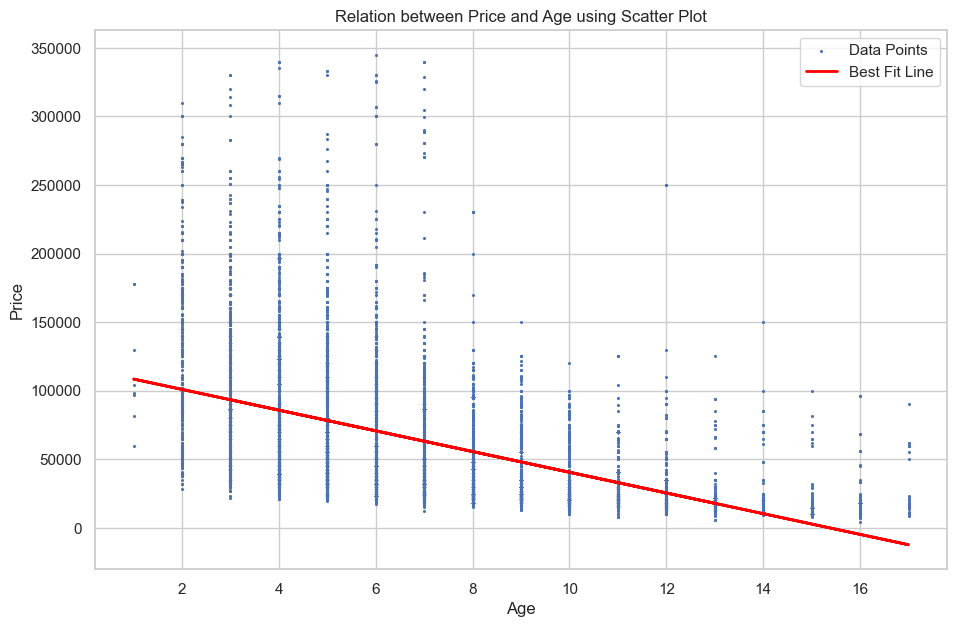

In [906]:
plot_scatter_chart(useful_df, "age", "price", "Relation between Price and Age using Scatter Plot")

### 📉 Price vs. Age of Bikes

##### **Older bikes tend to have lower prices**, reflecting depreciation over time

- Most bikes **under 5 years old** command **higher resale prices**.
- Beyond **10 years**, prices significantly decline, forming a **low-value cluster** except premium outliers.
- A few **young, high-priced outliers** suggest the presence of **premium or performance models**.
- The trend shows a **clear negative correlation** between age and resale price.

This highlights that **newer bikes hold better market value**, while older models face rapid depreciation. 🕒💸

## 8) Power (Engine CC) Column

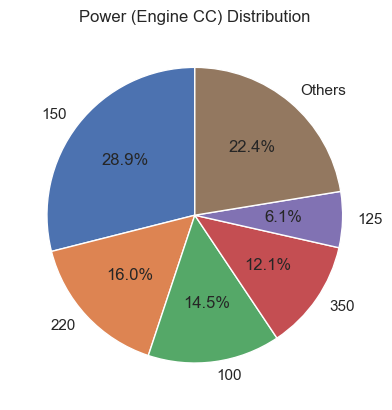

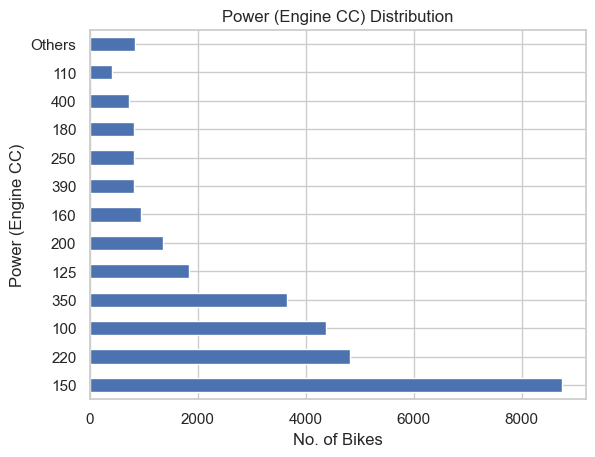

In [907]:
number_of_pies = 5
company_wise_sales_pie = useful_df.groupby("power").size().sort_values(ascending=False).head(number_of_pies).copy()
company_wise_sales_pie.loc['Others'] = useful_df.groupby("power").size().sort_values(ascending=False).tail(-number_of_pies).sum()
company_wise_sales_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, title="Power (Engine CC) Distribution")
plt.show()

number_of_pies = 12
company_wise_sales_pie = useful_df.groupby("power").size().sort_values(ascending=False).head(number_of_pies).copy()
company_wise_sales_pie.loc['Others'] = useful_df.groupby("power").size().sort_values(ascending=False).tail(-number_of_pies).sum()
company_wise_sales_pie.plot(kind='barh', title="Power (Engine CC) Distribution", ylabel="Power (Engine CC)", xlabel="No. of Bikes")
plt.show()

In [908]:
# plot_scatter_chart(useful_df, "power", "price", "Relation between Price and Power")

# Saving the useful Dataframe

Storing the cleaned data into a CSV file

In [909]:
useful_df.to_csv("Cleaned_Bike_Data.csv", index=False)
useful_df

,model,price,city,kms_driven,owner,age,power,brand,owner_encoded
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,1
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,1
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,1
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,1
5,Yamaha FZs 150cc,53499,Delhi,25000,First Owner,6,150,Yamaha,1
...,...,...,...,...,...,...,...,...,...
32641,Bajaj Avenger 220cc,41000,Delhi,20245,Second Owner,11,220,Bajaj,2
32643,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4,100,Hero,1
32644,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9,180,TVS,1
32645,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6,220,Bajaj,1
